Build an AI model that can classify SMS messages as spam or
legitimate. Use techniques like TF-IDF or word embeddings with
classifiers like Naive Bayes, Logistic Regression, or Support Vector
Machines to identify spam messages

In [1]:
#dataset:https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset

  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 85.9MB/s]


In [5]:
import zipfile
zip_ref= zipfile.ZipFile('/content/sms-spam-collection-dataset.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [32]:
df= pd.read_csv('/content/spam.csv', encoding='latin-1')

In [33]:
data= df.iloc[:,:2]

In [34]:
column_name={'v1':'category','v2':'message'}

In [35]:
data = data.rename(columns=column_name)
data

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [36]:
data.dtypes

category    object
message     object
dtype: object

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  5572 non-null   object
 1   message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [38]:
data['spam']= data['category'].apply(lambda x: 1 if x=='spam' else 0)
data

,category,message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


Text(0.5, 1.0, 'Count of Spam and Ham')

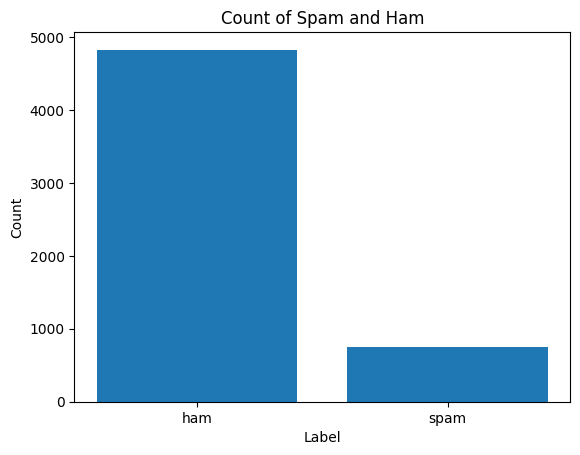

In [40]:
label_counts = data['category'].value_counts()

# Plotting
plt.bar(label_counts.index, label_counts.values)

# Adding labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of Spam and Ham')

In [41]:
label_counts

ham     4825
spam     747
Name: category, dtype: int64

In [42]:
X=data['message']
y= data['spam']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
vectorizer=CountVectorizer()

In [46]:
X_train_vectorizer= vectorizer.fit_transform(X_train)

In [49]:
X_train_vectorizer

<4457x7735 sparse matrix of type '<class 'numpy.int64'>'
	with 58978 stored elements in Compressed Sparse Row format>

In [51]:
model= MultinomialNB() # using  naive bayes thorem

In [52]:
model.fit(X_train_vectorizer,y_train)

MultinomialNB()

In [53]:
X_test_vect= vectorizer.transform(X_test)

In [54]:
model.score(X_test_vect,y_test)

0.9838565022421525

In [56]:
y_pred= model.predict(X_test_vect)

In [58]:
# confusion matrix
confusion_matrix(y_test,y_pred)

array([[963,   2],
       [ 16, 134]])

In [67]:
# Pre-trained model
pretrained_model = model
new_sentences = [input('enter the message')]
new_sentences_count = vectorizer.transform(new_sentences)
# Predict whether each sentence is spam (1) or not (0)
predictions = pretrained_model.predict(new_sentences_count)

for sentence, prediction in zip(new_sentences, predictions):
    if prediction == 1:
        print(f"'{sentence}' is a spam message.")
    else:
        print(f"'{sentence}' is not a spam message.")

enter the messagehello mate , how are you ?
'hello mate , how are you ?' is not a spam message.
